In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="whitegrid")

In [2]:
import os
os.listdir()


['.ipynb_checkpoints',
 'Asgn 5 5502 Report (2).docx',
 'crime_rates.csv',
 'INFO5502_Assignment5.pdf',
 'murder.jpg',
 'Nithin_s Asgn5.ipynb',
 'Untitled.ipynb']

In [3]:
df=pd.read_csv("crime_rates.csv")

In [4]:
df.head()

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.300003,10.2,20.799999,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,Alaska,1961,234000,88.900002,11.5,13.200000,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,Alaska,1962,246000,91.500000,4.5,18.700001,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,Alaska,1963,248000,109.699997,6.5,14.900000,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,Alaska,1964,250000,150.000000,10.4,22.400000,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000


In [5]:
df.isnull().sum() #no null values

State                       0
Year                        0
Population                  0
Violent Crime Rate          0
Murder Rate                 0
Forcible Rape Rate          0
Robbery Rate                0
Aggraveted Assault Rate     0
Property Crime Rate         0
Burglary Rate               0
Larceny & Theft Rate        0
Motor Vehicle Theft Rate    0
dtype: int64

### Question 1.1. What additional information will we need before we can check for that association?           Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let’s plot a couple, just to see the variety. 

In [6]:
df["State"].unique() #all states names which are in dataset

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachuse', 'Maryland', 'Maine',
       'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Isla',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

###  1.2)Draw a line plot with years on the horizontal axis and murder rates on the vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call: ak  mn.plot(’Year’). 

<AxesSubplot:xlabel='Year', ylabel='Murder Rate'>

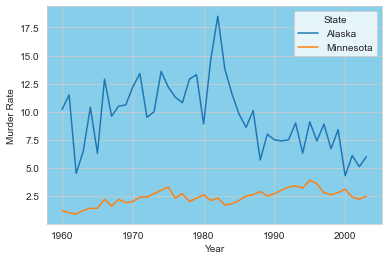

In [7]:
m = df.query("State == ['Alaska','Minnesota']")
ax = plt.axes()
ax.set_facecolor("skyblue")
sns.lineplot(data=m, y="Murder Rate",x="Year",hue=m["State"])


###  1.3). Implement the function most  murderous, which takes a year (an integer) as its argument. It does two things:
- 1. It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.
- 2. It returns an array of the names of these states in order of increasing murder rate.

1716    13.2
44      12.4
1936    12.3
396     11.9
352     10.6
Name: Murder Rate, dtype: float64


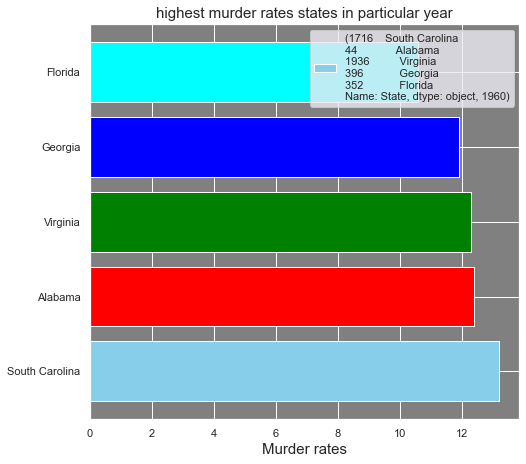

In [8]:
sns.set(rc={'figure.figsize':(7.7,7.27)})
def m(Y):
    s=df[df["Year"]==Y]
    s=s.sort_values("Murder Rate",ascending=False,)
    print(s["Murder Rate"].head()) 
    s=s.head()
    ax = plt.axes()
    ax.set_facecolor("grey")
    plt.title("highest murder rates states in particular year",size=15)
    plt.xlabel("Murder rates",size=15)
    plt.barh(s["State"],s["Murder Rate"],color=['skyblue', 'red', 'green', 'blue', 'cyan'],label=(s["State"],Y))
    plt.legend()
m(1960)

### 1.4). How many more people were murdered in California in 1988 than in 1975? Assign ca  change to the answer.

#### murder rate for state X in year Y = 100000 * (number of murders in state X in year Y / population in state X in year Y)

In [9]:
ca_1988=df[(df['State']=='California') & (df['Year']==1988)]
ca_1975=df[(df['State']=='California') & (df['Year']==1975)]
no_of_murders=round(int((ca_1988["Murder Rate"]*ca_1988["Population"])/100000)-int((ca_1975["Murder Rate"]*ca_1975["Population"])/100000),2)
print("no_of_murders ::{}".format(no_of_murders))

no_of_murders ::726


### 2.1). Implement the function two  year changes that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns the number of increases minus the number of decreases. 

In [10]:
df["Year"][2:]

2       1962
3       1963
4       1964
5       1965
6       1966
        ... 
2195    1999
2196    2000
2197    2001
2198    2002
2199    2003
Name: Year, Length: 2198, dtype: int64

In [11]:
df["Year"][:-2]

0       1960
1       1961
2       1962
3       1963
4       1964
        ... 
2193    1997
2194    1998
2195    1999
2196    2000
2197    2001
Name: Year, Length: 2198, dtype: int64

In [12]:
differences_state =[] 
def diff_twoyears(v, n): 
    a=[]
    b=[] 
    b1=np.array(v)[n:]
    c1=np.array(v)[:-n]
    for p in range(len(b1)):
        if b1[p]>c1[p]:
            a.append(True)
        if b1[p]<c1[p]:
            b.append(False)
        else:
            continue
    differences_state.append(len(a)-len(b))

for i in df['State'].unique():
       years=df[df['State']==i]['Year'].tolist()
       #print(years)
       Murder_rates=df[df['State']==i]['Murder Rate'].tolist()
       #print(Murder_rates)
       diff_twoyears(Murder_rates,2) 
print(differences_state)

[-5, -6, -1, 1, 17, -4, 4, -3, -6, -3, -2, 4, -3, 8, 5, 5, -6, 8, 2, 9, 5, -4, 6, 0, -2, 0, -10, 1, 5, -3, 10, -1, 5, 3, 3, 1, -1, 5, 6, -11, -3, -2, 2, 5, -8, -1, 6, 1, 3, 0]


#### 2.2) Assign changes by state to a table with one row per state that has two columns: the State name and the Murder Rate two year  changes statistic computed across all years in our data set for that state. 

In [13]:
pip install data-science

Note: you may need to restart the kernel to use updated packages.


State       | Murder Rate two_year_changes
Alabama     | -6
Alaska      | -5
Arizona     | 1
Arkansas    | -1
California  | 17
Colorado    | -4
Connecticut | 4
Delaware    | -3
Florida     | -6
Georgia     | -3
... (40 rows omitted)


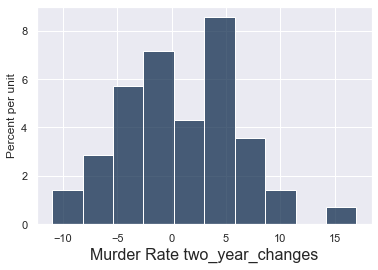

In [71]:
from datascience import *
def diff(v, n):
 return np.array(v)[n:] - np.array(v)[:-n]
diff(make_array(1, 10, 100, 1000, 10000), 2)
def two_years(deathrates):

   return np.count_nonzero(diff(deathrates, 2)>0) - np.count_nonzero(diff(deathrates, 2)<0) 


rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
rates.set_format("Population", NumberFormatter)
states = rates.sort('State',distinct = True).column(0)
changes = make_array()


for i in np.arange(len(states)):
   c = two_years(rates.where("State",states[i]).column(3))
   changes = np.append(changes,c)
    
    
diff_by_state = Table().with_columns("State",states,'Murder Rate two_year_changes',changes)

with pd.option_context("display.max_rows",50):
  print(diff_by_state)
diff_by_state.hist("Murder Rate two_year_changes")

#### 2.3) Assign total  changes to the total increases minus the total decreases for all two-year periods and all states in our data set. 

In [18]:
changes = sum(changes)
print('total changes to the total increases minus the total decreases for all two-year periods and all states:', changes)


total changes to the total increases minus the total decreases for all two-year periods and all states: 45.0


#### 2.4) Set num  changes to the number of different two-year periods in the entire data set that could result in a change of a state’s murder rate. Include both those periods where a change occurred and the periods where a state’s rate happened to stay the same.

In [19]:
no_of_changes=[]
for state in df['State'].unique():
    s=df[df['State']==state]
    year=s['Year']
    no_of_changes.append(len(np.array(year)[2:]-np.array(year)[:-2]))
print(sum(no_of_changes))

2100


#### 2.5) Given these null and alternative hypotheses, define a good test statistic. 

test statistic depend only on whether murder rates increased or decreased, not on the size

#### 2.6)  Complete the simulation below, which samples num  changes increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis. 

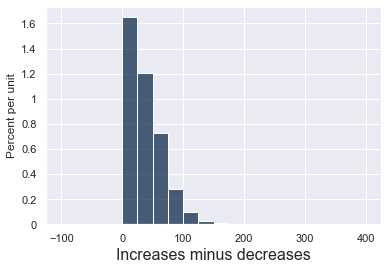

In [20]:
ufm = Table().with_columns("Change", make_array('Increase', 'Decrease'),"Chance", make_array(0.5,0.5))
ufm.sample_from_distribution('Chance', 100)
def simulate_under_null(num_chances_to_change):
  s = ufm.sample_from_distribution("Chance", num_chances_to_change).column(2)
  increases = s.item(0)
  decreases = s.item(1)
  return abs(increases - decreases)
ufm_samples = make_array()
for i in np.arange(5000):
    ufm_samples = np.append(ufm_samples, simulate_under_null(sum(no_of_changes)))
Table().with_column('Increases minus decreases', ufm_samples).hist(0,bins=np.arange(-100, 400+25, 25))


#### 3.3) Assign death penalty murder rates to a table with the same columns and data as murder rates, but that has only the rows for states that had the death penalty in 1971.  

In [28]:
import warnings
warnings.filterwarnings("ignore")
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def death_penalty_in_1971(state):
    return state not in non_death_penalty_states

states = rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(death_penalty_in_1971, 0))
no_of_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows

states_penalty = death_penalty.where("Death Penalty", are.equal_to(True))
penalty_murder_rates = rates.where("State", are.equal_to(states_penalty.column("State")))
penalty_murder_rates


State,Year,Population,Murder Rate
Alabama,1960,"3,266,740",12.4
Alabama,1961,"3,302,000",12.9
Alabama,1962,"3,358,000",9.4
Alabama,1963,"3,347,000",10.2
Alabama,1964,"3,407,000",9.3
Alabama,1965,"3,462,000",11.4
Alabama,1966,"3,517,000",10.9
Alabama,1967,"3,540,000",11.7
Alabama,1968,"3,566,000",11.8
Alabama,1969,"3,531,000",13.7


#### 3.4)  Assign changes 72 to the value of the test statistic for the years 1971 to 1973 and the states in death  penalty  murder  rates. 

In [30]:
years= penalty_murder_rates.where('Year',are.between(1971,1974))
sortyears=years.sort('State',distinct =True).column(0)
changes = make_array()
for i in np.arange(len(sortyears)):
  s = diff(years.where('State',sortyears[i]).column(3),2)
  changes = np.append(changes,s)
  teststatistic= np.count_nonzero(changes<0)-np.count_nonzero(changes>0)
print(' test statistic for the years 1971 to 1973 :', -teststatistic)

 test statistic for the years 1971 to 1973 : 22


#### 3.5) Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 5,000 times. 

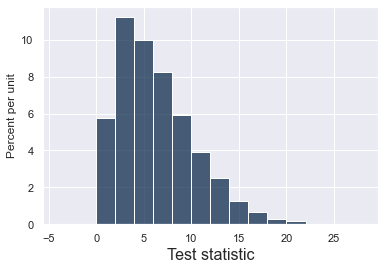

In [31]:
makearr = make_array()
for i in np.arange(10000):
    simulate=simulate_under_null(len(sortyears))
    makearr = np.append(makearr,simulate)
Table().with_column('Test statistic', makearr).hist(bins=np.arange(-4, 28+2, 2))


#### 3.6) Complete the analysis as follows: 1. Compute a P-value.2. Draw a conclusion about the null and alternative hypotheses.3. Describe your findings using simple, non-technical language. Be careful not to claim that the statisticalanalysis has established more than it really has.

In [32]:
makearr=np.array(makearr)
empirical_Pvalue=np.count_nonzero(makearr >= abs(teststatistic) ) / i
print(empirical_Pvalue)

0.001000100010001


#### 4.1) Implement run test, which takes the following arguments: • A table of murder rates for certain states, sorted by state and year like murder  rates, and• the year when the analysis starts. (The comparison group is two years later.)It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis. 

In [33]:
import datascience as ds
testval=[]
ufm = Table().with_columns("Change", ds.make_array('Increase', 'Decrease'),"Chance", ds.make_array(0.5,0.5))
test_statistics=ufm.sample_from_distribution('Chance', 100)# It will take equal chance of ufm distribution

def run_test(size,start_year):
    testval.append(ufm.sample_from_distribution('Chance',100).column(2).item(0)-ufm.sample_from_distribution('Chance', 100).column(2).item(1))
          
for test in range(5000):#It will run 5000 times to get 5000 samples
    run_test(44,1971)  
test_values1=np.array(testval)
empirical_P=np.count_nonzero(test_values1>=22) / test#P value calculation
print(abs(teststatistic))
print("pval:",empirical_P)
run_test(penalty_murder_rates,1971)

22
pval: 0.00040008001600320064


#### 5.1) Create a table called average murder  rates with 1 row for each year in murder rates. It should have 3 columns: 

In [35]:
years = rates.sort('Year', distinct = True).column('Year')
death = rates.drop('Population').where(0, are.not_contained_in(non_death_penalty_states)).group('Year', np.average).column(2)
nodeath = rates.drop('Population').where(0, are.contained_in(non_death_penalty_states)).group('Year', np.average).column(2)
df1 = Table().with_columns('Year', years, 'Death', death, 'No death ', nodeath)
df1

Year,Death,No death
1960,5.27955,3.55
1961,4.77727,3.68333
1962,4.61591,2.33333
1963,4.61364,2.75
1964,4.71136,3.4
1965,4.82727,3.18333
1966,5.43182,4.51667
1967,5.875,3.73333
1968,6.27045,4.73333
1969,6.50227,4.73333


#### 5.2) average murder rates.plot(’Year’). 

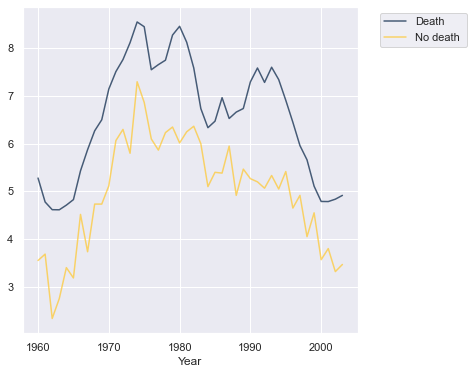

In [36]:
df1.plot("Year")